In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

In [15]:
df=pd.read_csv('imdb_dataset.csv')
df.dropna(inplace=True)
df['cleaned_review'] = df['review'].apply(lambda x: ' '.join(word_tokenize(str(x).lower())))
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


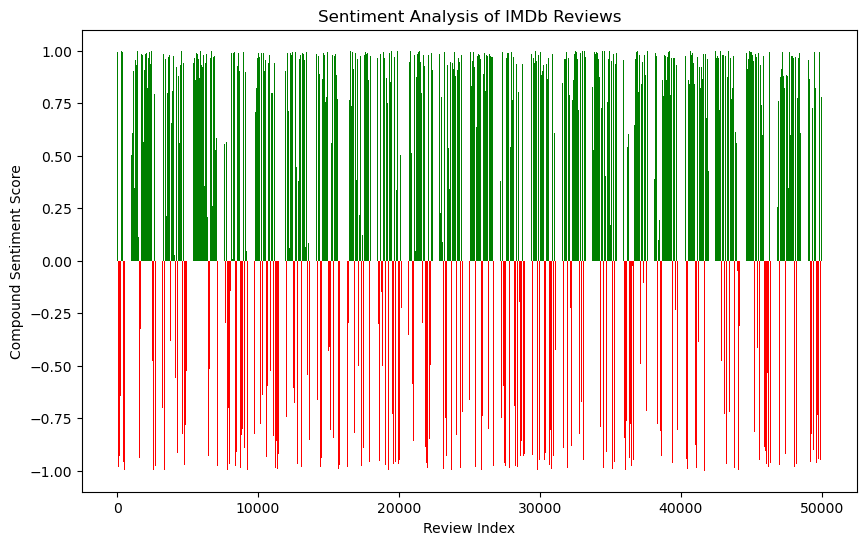

In [16]:
# Sentiment analysis using NLTK's SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['cleaned_review'].apply(lambda x: sia.polarity_scores(x))

# Extract compound scores
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Assign labels based on the compound score
df['sentiment_label'] = df['compound_score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

plt.figure(figsize=(10, 6))
plt.bar(range(len(df)), df['compound_score'], color=df['sentiment_label'].map({'positive': 'green', 'negative': 'red', 'neutral': 'gray'}))
plt.xlabel('Review Index')
plt.ylabel('Compound Sentiment Score')
plt.title('Sentiment Analysis of IMDb Reviews')
plt.show()

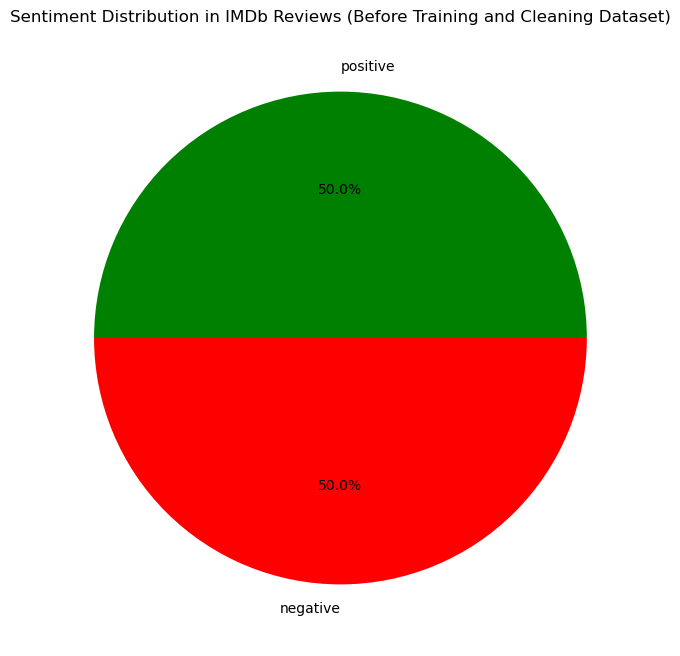

In [20]:
counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Sentiment Distribution in IMDb Reviews (Before Training and Cleaning Dataset)')
plt.show()

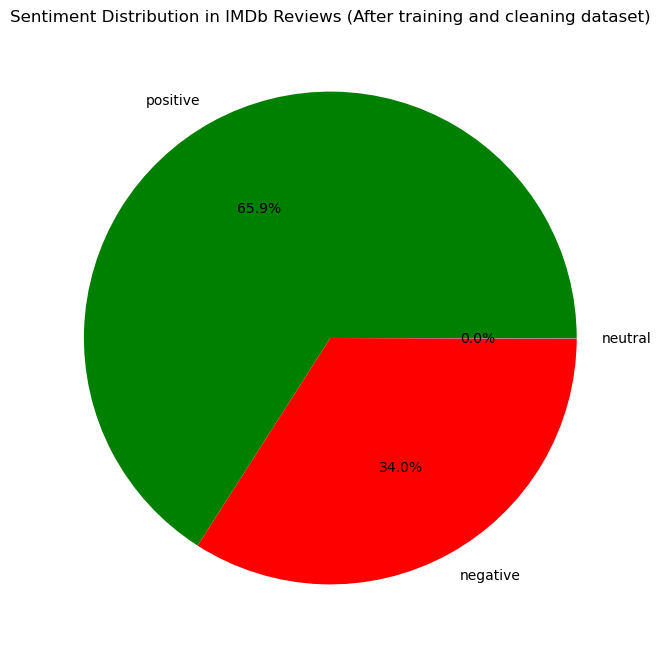

In [21]:
sentiment_counts = df['sentiment_label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title('Sentiment Distribution in IMDb Reviews (After training and cleaning dataset)')
plt.show()

<h1>Overview</h1>

In this project, i performed sentiment analysis on a dataset of IMDb reviews using natural language processing (NLP) techniques in Python. The dataset contained customer reviews from the IMDb platform and already had sentiment. So what im doing is to proof the dataset is right or not because the dataset before training is so sus like positive review is 50% and negative is 50%. And then when i do the training and cleaning the dataset show <b>positive</b> review <b>65.9%</b> and <b>negative</b> review is <b>34%</b>

<h1>Data Processing and Cleaning</h1>

started by loading the IMDb dataset into a DataFrame and handled missing values. After that, i cleaned the text data by converting it to lowercase, removing unnecessary characters, and tokenizing the reviews using NLTK's word_tokenize. Subsequently, i used NLTK's SentimentIntensityAnalyzer to calculate compound sentiment scores for each review.

<h1>Conclusion</h1>

This project demonstrates how to preprocess text data and perform sentiment analysis using NLTK in Python. The visualizations provide a clear understanding of the sentiment distribution in the IMDb reviews dataset, which can be valuable for making data-driven decisions in the context of customer feedback.